### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt  #Importing important library.

In [2]:
df=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/bank_marketing_part1_Data.csv') #Importing of Dataset

In [3]:
df.head() #Correctly imported

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [137]:

#Eyeballing on the data,we can see there's should not be much issues of outliers as there's not a significant difference
#between 75 percentile and max value for all the variables. But we will confirm this by plotting box plot at later stage.
df.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.duplicated().sum() #No duplicated values

0

In [8]:
df.isnull().sum() #No null values

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

<Figure size 1080x1080 with 0 Axes>

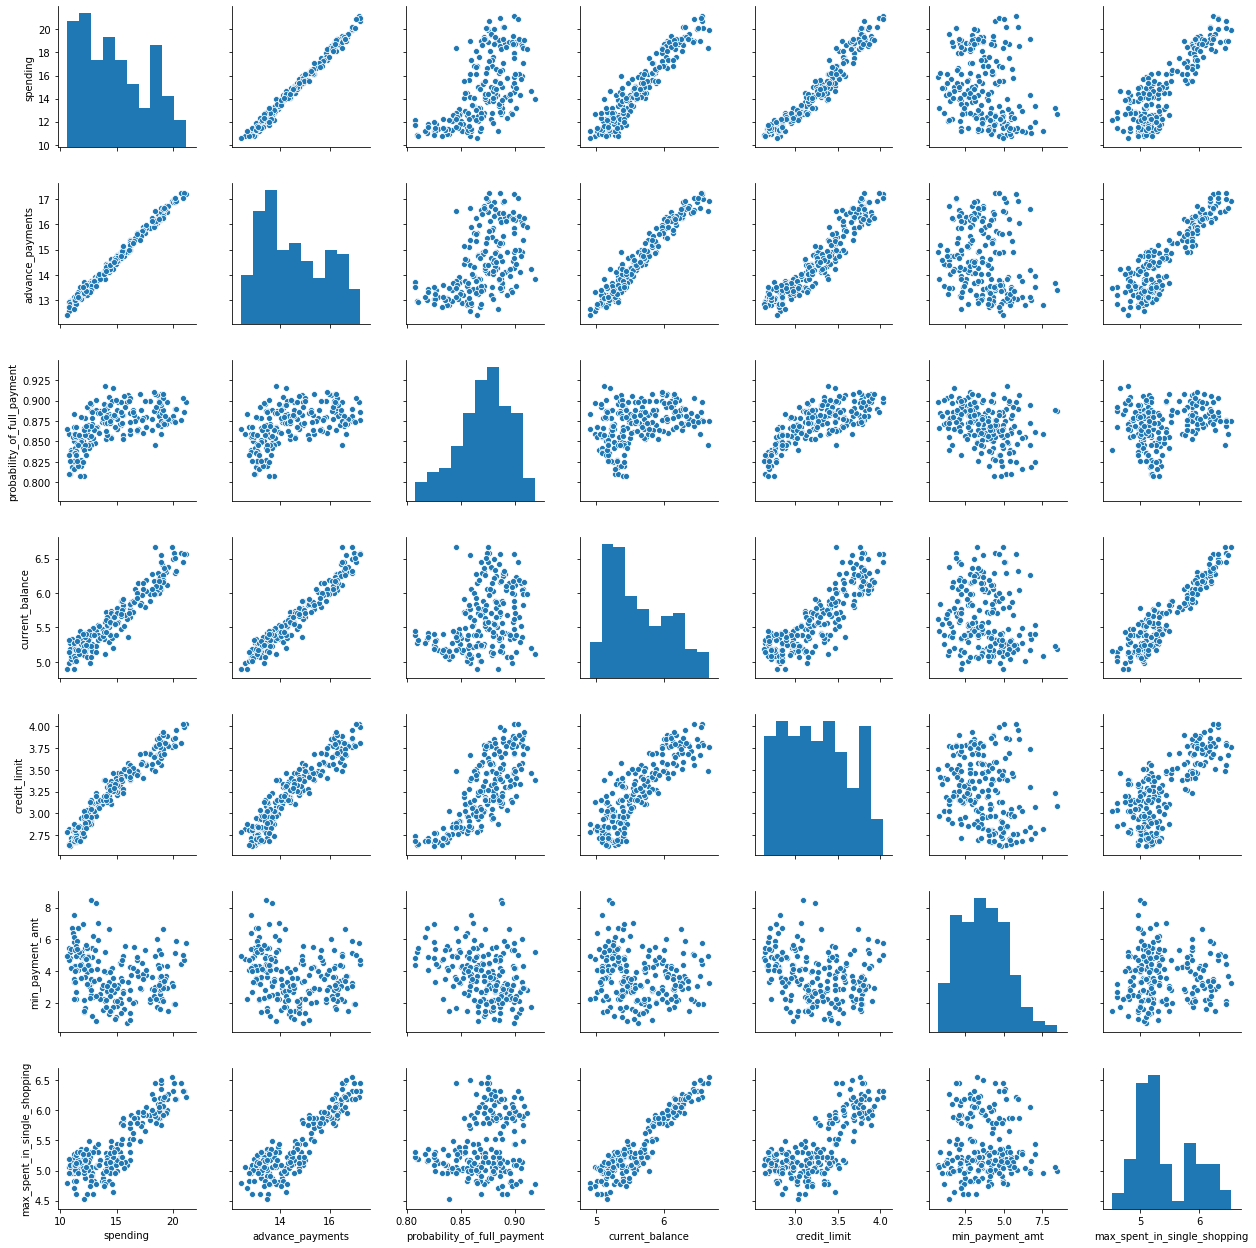

In [4]:
plt.figure(figsize=(15,15))
sns.pairplot(df) 
#There are few good correlation between variables such as spending & advance payments, spending & current balance,
#spending and credit_limit,spending & max_spent_in_single_shopping etc.

#No such variables is compltely normally distributed. Variabels such as probability_of_full_payment is left-skewed
#and probability_of_full_payment is right skewed.



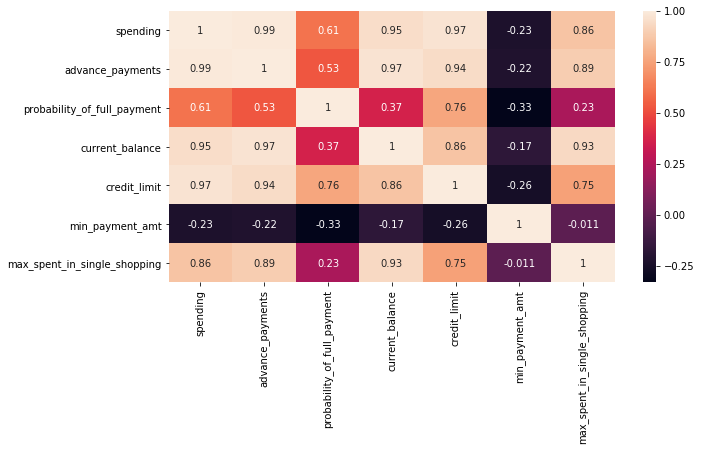

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True) 
#From the heatmap we can see there are lots of variable having extremely good correlations


### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [141]:
#Yes, we will have to apply the scaling as Hierarichal and Kmeans both used distance based algorithms for calculation. 
#Moreover if we look at the data, we can notice that some of the variables are on different scales.For example
#probability_of_full_payment is on 10^(-4) scale whereas spending is on hundredth scale. Hence its become more necessary to
#scale the data.

#Moreover we will go for zscaling as the variance between the columns are more or less same.

In [10]:
from scipy.stats import zscore

In [11]:
df=df.apply(zscore)

In [12]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [13]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


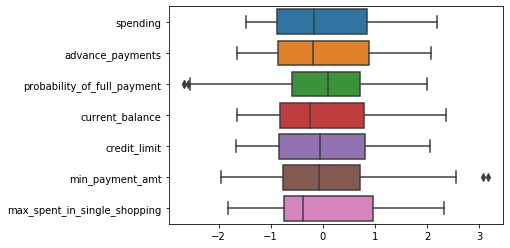

In [14]:
sns.boxplot(data=df,orient='h'
           )

In [15]:
#From the boxplot we can see that there are 2 columns for which outliers exist. We will treat those values with min & max 
#value of IQR

In [16]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df[col],[25,75])
    IQR=Q3-Q1
    Qmin=Q1-1.5*IQR
    Qmax=Q3+1.5*IQR
    df[col]=np.where(df[col] < Qmin,Qmin,df[col])
    df[col]=np.where(df[col] > Qmax,Qmax,df[col])
    

In [17]:
for col in df.columns:
    outlier_treatment(col)

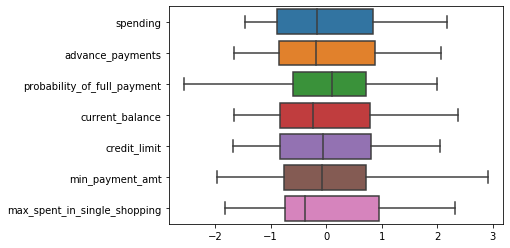

In [18]:
sns.boxplot(data=df,orient='h'
           )  #No outliers present

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [23]:
wardlink=linkage(df,metric='euclidean',method='ward')

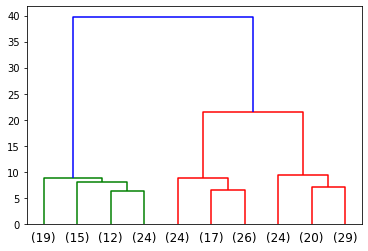

In [92]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)     #Inserting pruning parameters as well while designing model.


#### From the dendogram, we can see that whole data could be divided into 2 clusters. Let us explore the data in both the cluster in below steps.

In [26]:
from scipy.cluster.hierarchy import fcluster

In [93]:
clusters =fcluster(wardlink,2,criterion='maxclust')  
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [ ]:
#No.1 belongs to cluster 1 ,No. 2 items belong to cluster 2 etc

In [49]:
df1=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/bank_marketing_part1_Data.csv')

In [50]:
df1['clusters']=clusters

In [51]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [55]:
df1[df1['clusters']==1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.0
std,1.381233,0.599277,0.014767,0.245926,0.174909,1.208271,0.251132,0.0
min,15.380000,14.860000,0.845200,5.709000,3.268000,1.472000,5.443000,1.0
25%,17.330000,15.737500,0.874700,5.979250,3.554250,2.845500,5.877000,1.0
50%,18.720000,16.210000,0.883950,6.148500,3.693500,3.629000,5.981500,1.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.459250,6.187750,1.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0


In [54]:
df1[df1['clusters']==2].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0
mean,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,2.0
std,1.550003,0.696916,0.024405,0.230740,0.249454,1.634514,0.226834,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,2.0
25%,11.817500,13.207500,0.848075,5.179000,2.835250,2.461750,5.000000,2.0
50%,12.770000,13.665000,0.865800,5.351000,3.037000,3.597500,5.091500,2.0
75%,14.347500,14.305000,0.882075,5.521750,3.234500,4.879250,5.222500,2.0
max,16.630000,15.460000,0.918300,6.053000,3.582000,8.456000,5.879000,2.0


### Outcomes
1)Looking at the mean and sd we can see that the customer belonging to cluster 1 has higher spending habit as compared to cluster2

2)Customer from cluster 1 are better at advance_payments than cluster 2.

3)Customer from cluster 1 are spending more in single shopping. 

4)There is a marginal difference between credit_limit.

### Suggestions
1) As customers from cluster 1 have better records, we can consider them as our premium customers.We can introduce cashback offers for them to encourage more on spending.

2) As there is marginal diffence in credit_limit between our premium and normal customers, it would be good if we can increase
the credit limit for our premium customers.Moreover there is a strong correlation between spending and credit limit. So we should increase the credit limit for both the customer segments.

3)Customer from cluster 2 lacks in advance payment. We can introduce some schemes like doubling of reward point if someone pays
in advance.

4) To increase the minimum paying amount, we can introduce some cashback offers on a minimum purchase upto certain amount.

## K-means 

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [6]:
from sklearn.cluster import KMeans  #Importing of necessary Kmeans package.

In [124]:
k_means=KMeans(n_clusters=3)   #Let us start by considering 3 clusters.

In [125]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [127]:
k_means.inertia_    #Total WSS corresponding to k=3
                    #WSS = dist between every observation with the centroid of cluster, squaring it up and then adding 
 

427.97721673953674

In [147]:
k_means=KMeans(n_clusters=2)  #Considering no. of clusters =2 
k_means.fit(df) 
k_means.inertia_ 

655.6870659927683

In [19]:
wss=[] #Creation of empty list 

In [20]:
for i in range(1,9):
    k_means=KMeans(n_clusters=i)
    k_means=k_means.fit(df)
    wss.append(k_means.inertia_)
    
#Calculating inertia for clusters ranging from 1 to 8   

In [21]:
wss

[1466.2981569540952,
 655.6870659927683,
 427.97721673953674,
 369.11122176906497,
 324.2329578705769,
 287.0808928071988,
 260.7925178225852,
 239.3776163259967]

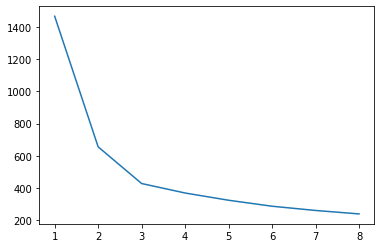

In [22]:
plt.plot(range(1,9), wss)   

#2 or 3 will be our optimum number of clusters. There has been a significant drop in wss value while moving from cluster 1 till 3
#After that there's a marginal decrease in wss value.              
#Let us consider both the values i.e 2 & 3 and then consider which cluster is segmenting better.
#Let us start from no. of clusters =2

In [23]:
k_means=KMeans(n_clusters=2)
k_means=k_means.fit(df)
labels=k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [24]:
df2=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/bank_marketing_part1_Data.csv')

In [25]:
df2['Klabels']=labels

In [26]:
df2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [27]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [28]:
silhouette_score(df,labels)
df2['silhouette_samples']=silhouette_samples(df,labels)
df2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.603653
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.010025
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.677866
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.497757
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.547713


In [32]:
df2.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.366667,0.466450
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.483046,0.165480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000,-0.004726
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000,0.378326
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000,0.523122
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000,0.590010
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000,0.677866


In [34]:
df2[df2['silhouette_samples'] < 0].count()

spending                        1
advance_payments                1
probability_of_full_payment     1
current_balance                 1
credit_limit                    1
min_payment_amt                 1
max_spent_in_single_shopping    1
Klabels                         1
silhouette_samples              1
dtype: int64

In [29]:
df2[df2['Klabels'] == 1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000
mean,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.0,0.510474
std,1.483999,0.641792,0.015177,0.257327,0.186514,1.281527,0.294989,0.0,0.163995
min,15.380000,14.860000,0.845200,5.618000,3.231000,0.765100,5.091000,1.0,0.013436
25%,16.840000,15.550000,0.873500,5.920000,3.505000,2.553000,5.837000,1.0,0.444495
50%,18.550000,16.180000,0.882900,6.113000,3.684000,3.368000,5.965000,1.0,0.583673
75%,19.110000,16.500000,0.898400,6.285000,3.796000,4.391000,6.185000,1.0,0.624837
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,1.0,0.677866


In [30]:
df2[df2['Klabels'] == 0].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000
mean,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,0.0,0.440963
std,1.428131,0.635028,0.024497,0.208434,0.238913,1.609146,0.199294,0.0,0.161517
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.855100,4.519000,0.0,-0.004726
25%,11.750000,13.190000,0.847300,5.176000,2.821000,2.587000,4.963000,0.0,0.352698
50%,12.720000,13.570000,0.865700,5.333000,3.026000,3.638000,5.089000,0.0,0.495250
75%,14.110000,14.210000,0.881900,5.479000,3.201000,4.924000,5.220000,0.0,0.568622
max,15.990000,14.940000,0.918300,5.789000,3.582000,8.456000,5.491000,0.0,0.616961


In [142]:
#We can see that the minimum values of silhouette score for some rows has reached negative which means the classification 
#is not proper for few records.

In [31]:
df2[df2['silhouette_samples'] < 0]  #There is one record having negative silhouette score

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
102,15.38,14.66,0.899,5.477,3.465,3.6,5.439,0,-0.004726


In [168]:
k_means=KMeans(n_clusters=3)  #Let us consider number of clusters to be 3
k_means=k_means.fit(df)
labels=k_means.labels_
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [36]:
df3=pd.read_csv('file:///C:/Users/RIKKI/Desktop/Notes/Datasets/bank_marketing_part1_Data.csv')

In [37]:
k_means=KMeans(n_clusters=3)  #Let us consider number of clusters to be 3
k_means=k_means.fit(df)
labels=k_means.labels_
df3['Klabels']=labels
silhouette_score(df,labels)
df3['silhouette_samples']=silhouette_samples(df,labels)
df3.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.515791
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [40]:
df3['silhouette_samples'].describe()

count    210.000000
mean       0.401160
std        0.167702
min        0.003972
25%        0.296053
50%        0.462502
75%        0.524456
max        0.639285
Name: silhouette_samples, dtype: float64

In [39]:
#There is no record having negative silhouette score. Although the mean value of silhouette score is less but we will proceed
#with number of clusters=3

df3[df3['silhouette_samples'] < 0]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples


### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [174]:
df3[df3['Klabels'] == 0].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000
mean,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.0,0.338561
std,1.056513,0.525706,0.015502,0.225266,0.154766,1.176440,0.269558,0.0,0.166285
min,12.080000,13.150000,0.852700,4.984000,2.936000,0.765100,4.605000,0.0,0.003972
25%,13.820000,14.030000,0.871300,5.380000,3.155000,1.951000,4.958500,0.0,0.234095
50%,14.430000,14.390000,0.881900,5.541000,3.258000,2.640000,5.132000,0.0,0.369179
75%,15.260000,14.760000,0.893350,5.689500,3.378000,3.332000,5.263500,0.0,0.478993
max,16.440000,15.270000,0.918300,5.920000,3.582000,6.685000,5.879000,0.0,0.552946


In [175]:
df3[df3['Klabels'] == 1].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000
mean,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,1.0,0.399972
std,0.714801,0.355208,0.019953,0.141795,0.138689,1.354711,0.184012,0.0,0.159150
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.502000,4.519000,1.0,0.005537
25%,11.255000,12.992500,0.835000,5.139250,2.738500,4.032250,5.001000,1.0,0.317377
50%,11.825000,13.250000,0.848600,5.225000,2.836500,4.799000,5.089000,1.0,0.460288
75%,12.395000,13.482500,0.861475,5.337250,2.967000,5.463750,5.223500,1.0,0.517004
max,13.340000,13.950000,0.888300,5.541000,3.232000,8.456000,5.491000,1.0,0.588916


In [176]:
df3[df3['Klabels'] == 2].describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Klabels,silhouette_samples
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000
mean,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,2.0,0.468772
std,1.277122,0.546439,0.014917,0.237807,0.166014,1.211052,0.229566,0.0,0.153712
min,15.560000,14.890000,0.845200,5.718000,3.387000,1.472000,5.484000,2.0,0.029792
25%,17.590000,15.855000,0.874650,6.011500,3.564500,2.848000,5.879000,2.0,0.419827
50%,18.750000,16.230000,0.882900,6.153000,3.719000,3.619000,6.009000,2.0,0.523482
75%,19.145000,16.580000,0.898050,6.328000,3.808000,4.421000,6.192500,2.0,0.574340
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0,0.639285


##### Comparing 3 clusters with each other. Observations and suggestions
People from cluster 2 is spending the most, followed by cluster 0. Cluster 1 has lowest spending.

Credit limit for cluster 2 customers is highest,followed by cluster 0 and then cluster 1

Credit limit for cluster 1 should be increased.

Current balance for cluster 1 and cluster 0 is quite less as compared to cluster 2. Some saving schemes should be introduced

for cluster 1 and 0 to increase current balance.

Max spent in single shopping for cluster 0 & 1 is less. Some cashback offers can be introduced on a certain minimum purchase.
